In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task001/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv
/kaggle/input/task001/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv
/kaggle/input/task001/API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv


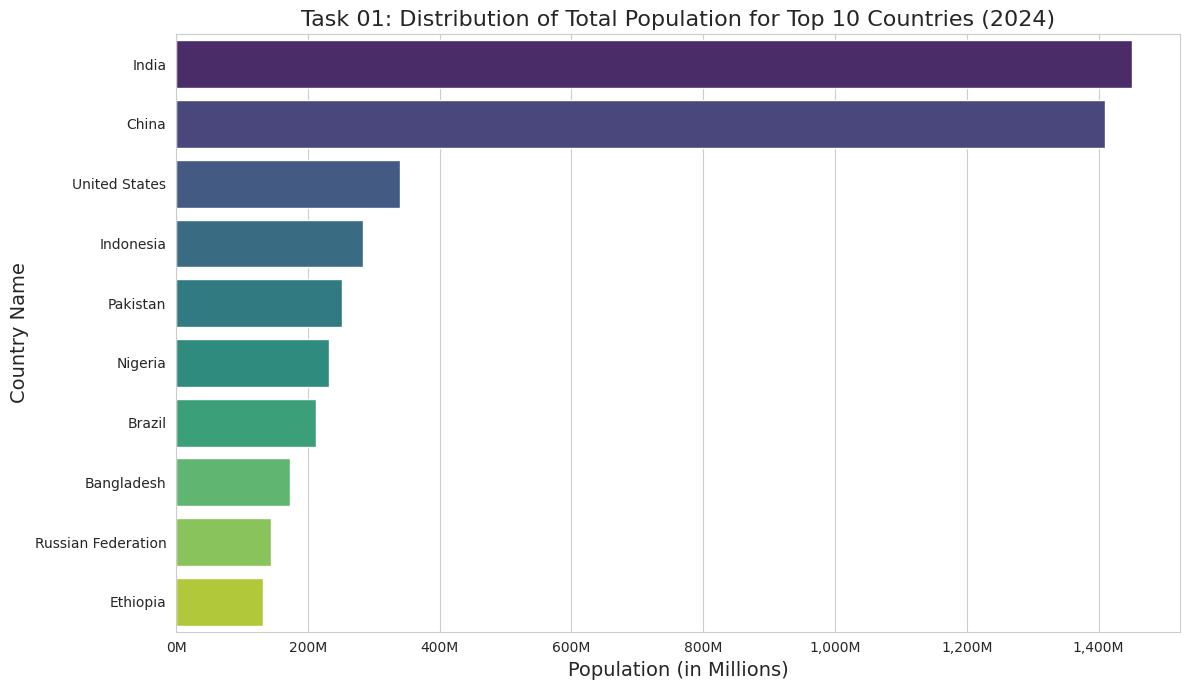

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


sns.set_style("whitegrid")


df_pop = pd.read_csv('/kaggle/input/task001/API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv', skiprows=4)
df_metadata = pd.read_csv('/kaggle/input/task001/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv')


df_merged = pd.merge(
    df_pop, 
    df_metadata[['Country Code', 'Region']], 
    on='Country Code', 
    how='left'
)
df_countries = df_merged.dropna(subset=['Region'])

df_latest_pop = df_countries[['Country Name', '2024']].copy()
df_latest_pop.dropna(subset=['2024'], inplace=True)

df_top_10 = df_latest_pop.sort_values(by='2024', ascending=False).head(10)

plt.figure(figsize=(12, 7))

def millions_formatter(x, pos):
    return f'{x / 1e6:,.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

sns.barplot(
    x='2024', 
    y='Country Name', 
    data=df_top_10, 
    palette='viridis'
)

plt.title('Task 01: Distribution of Total Population for Top 10 Countries (2024)', fontsize=16)
plt.xlabel('Population (in Millions)', fontsize=14)
plt.ylabel('Country Name', fontsize=14)

plt.tight_layout()
plt.savefig('task_01_population_bar_chart.png')
plt.show()

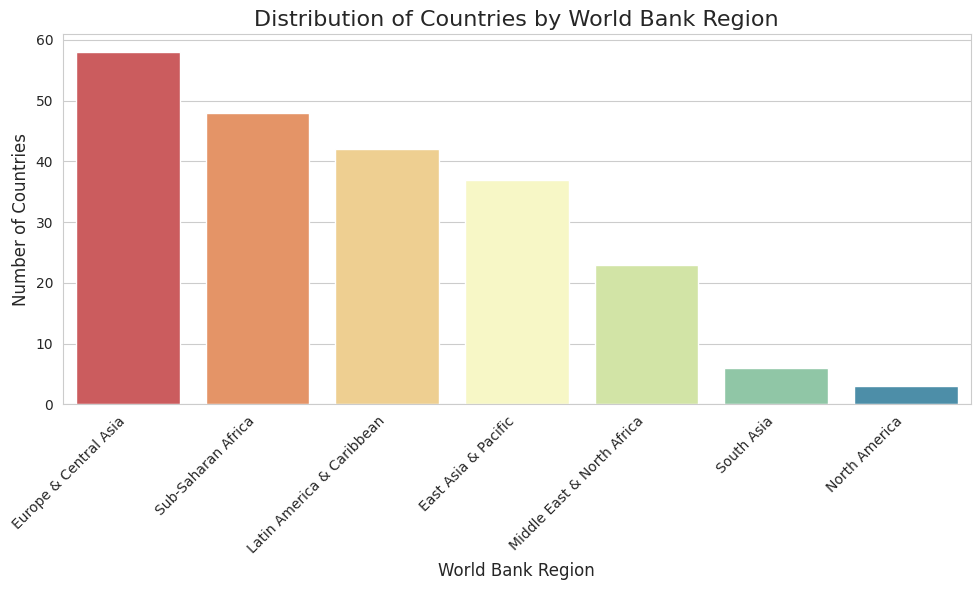

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


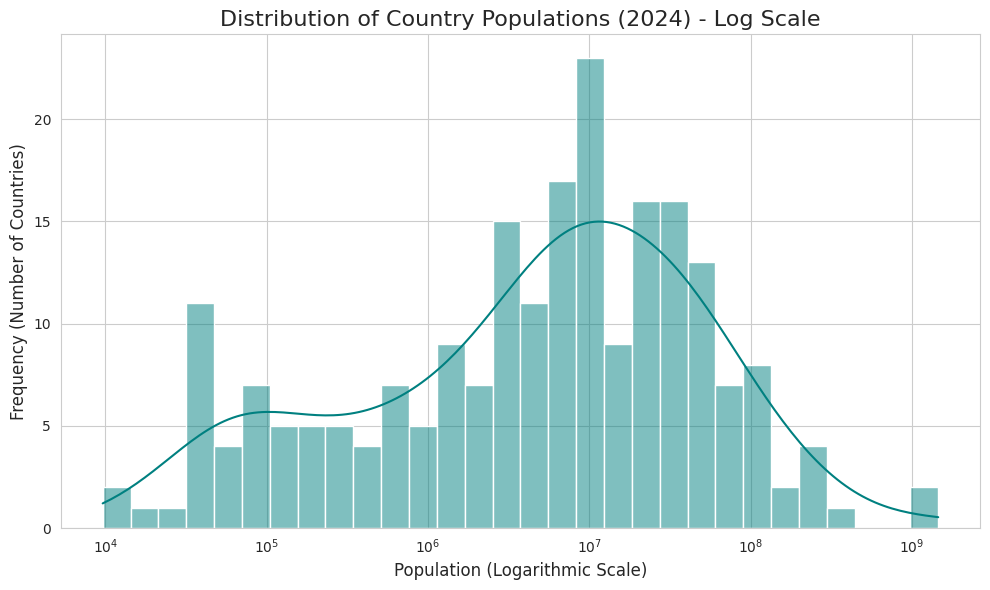

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_style("whitegrid")


df_pop = pd.read_csv('/kaggle/input/task001/API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv', skiprows=4)
df_metadata = pd.read_csv('/kaggle/input/task001/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv')

df_merged = pd.merge(
    df_pop[['Country Code', '2024']], 
    df_metadata[['Country Code', 'Region', 'IncomeGroup']], 
    on='Country Code', 
    how='left'
)
df_countries = df_merged.dropna(subset=['Region']).copy()
df_countries.rename(columns={'2024': 'Population_2024'}, inplace=True)
df_countries.dropna(subset=['Population_2024'], inplace=True)


region_counts = df_countries['Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Spectral')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribution of Countries by World Bank Region', fontsize=16)
plt.xlabel('World Bank Region', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.tight_layout()
plt.savefig('task_01_country_region_bar_chart.png')
plt.show()


plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_countries, 
    x='Population_2024', 
    bins=30, 
    kde=True,
    log_scale=True, 
    color='teal'
)

plt.title('Distribution of Country Populations (2024) - Log Scale', fontsize=16)
plt.xlabel('Population (Logarithmic Scale)', fontsize=12)
plt.ylabel('Frequency (Number of Countries)', fontsize=12)

plt.tight_layout()
plt.savefig('task_01_population_histogram_log.png')
plt.show() 

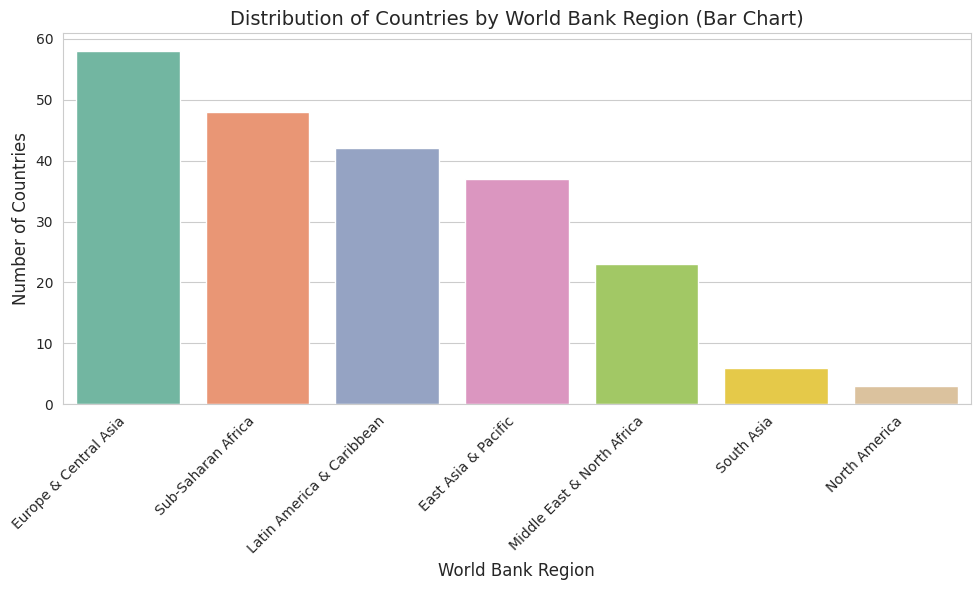

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pop = pd.read_csv('/kaggle/input/task001/API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv', skiprows=4)
df_metadata = pd.read_csv('/kaggle/input/task001/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv')

df_merged = pd.merge(
    df_pop[['Country Code']], 
    df_metadata[['Country Code', 'Region']], 
    on='Country Code', 
    how='left'
)
df_countries = df_merged.dropna(subset=['Region']).copy()

region_counts = df_countries['Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=region_counts.index, 
    y=region_counts.values, 
    palette='Set2'
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribution of Countries by World Bank Region (Bar Chart)', fontsize=14)
plt.xlabel('World Bank Region', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

plt.tight_layout()
plt.savefig('distribution_categorical_region_bar_chart.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


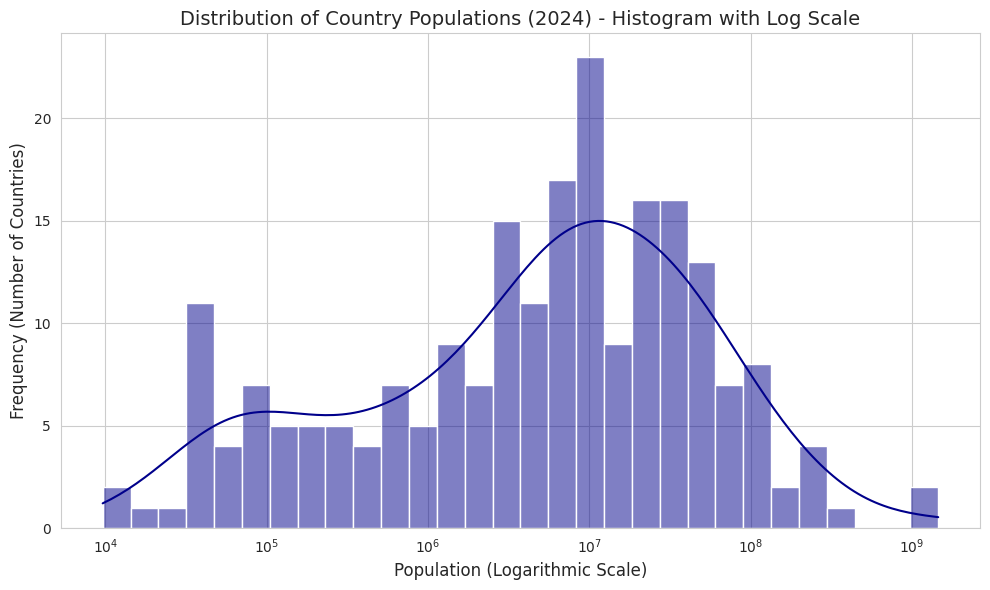

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_pop = pd.read_csv('/kaggle/input/task001/API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv', skiprows=4)
df_metadata = pd.read_csv('/kaggle/input/task001/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv')

df_merged = pd.merge(
    df_pop[['Country Code', '2024']], 
    df_metadata[['Country Code', 'Region']], 
    on='Country Code', 
    how='left'
)
df_countries = df_merged.dropna(subset=['Region']).copy()
df_countries.rename(columns={'2024': 'Population_2024'}, inplace=True)
df_countries.dropna(subset=['Population_2024'], inplace=True)

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_countries, 
    x='Population_2024', 
    bins=30, 
    kde=True,
    log_scale=True, 
    color='darkblue'
)

plt.title('Distribution of Country Populations (2024) - Histogram with Log Scale', fontsize=14)
plt.xlabel('Population (Logarithmic Scale)', fontsize=12)
plt.ylabel('Frequency (Number of Countries)', fontsize=12)

plt.tight_layout()
plt.savefig('distribution_continuous_population_histogram.png')
plt.show()